In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Untuk mempermudah, simpan setiap objek agar dapat digunakan untuk pemodelan maupun deployment. Gunakan library Pickle
import pickle

%matplotlib inline

In [ ]:
!pip -q install sastrawi

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
!wget https://raw.githubusercontent.com/rizalespe/Dataset-Sentimen-Analisis-Bahasa-Indonesia/master/dataset_tweet_sentiment_opini_film.csv

--2022-10-05 03:54:55--  https://raw.githubusercontent.com/rizalespe/Dataset-Sentimen-Analisis-Bahasa-Indonesia/master/dataset_tweet_sentiment_opini_film.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22687 (22K) [text/plain]
Saving to: ‘dataset_tweet_sentiment_opini_film.csv.1’

dataset_tweet_senti 100%[===================>]  22.16K  --.-KB/s    in 0s      

2022-10-05 03:54:56 (113 MB/s) - ‘dataset_tweet_sentiment_opini_film.csv.1’ saved [22687/22687]



In [ ]:
data = pd.read_csv('dataset_tweet_sentiment_opini_film.csv')
data.head()

,Id,Sentiment,Text Tweet
0,1,negative,Jelek filmnya... apalagi si ernest gak mutu bg...
1,2,negative,Film king Arthur ini film paling jelek dari se...
2,3,negative,@beexkuanlin Sepanjang film gwa berkata kasar ...
3,4,negative,Ane ga suka fast and furious..menurutku kok je...
4,5,negative,"@baekhyun36 kan gua ga tau film nya, lu bilang..."


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Id          200 non-null    int64 
 1   Sentiment   200 non-null    object
 2   Text Tweet  200 non-null    object
dtypes: int64(1), object(2)
memory usage: 4.8+ KB


In [ ]:
print('Total data: ', data.shape[0], 'data\n')
print('Label:')
print('-- [0] Negative: ', data[data.Sentiment == 'negative'].shape[0], 'data')
print('-- [1] Positive: ', data[data.Sentiment == 'positive'].shape[0], 'data')

Total data:  200 data

Label:
-- [0] Negative:  100 data
-- [1] Positive:  100 data


In [ ]:
import re

def casefolding(text):
  text = text.lower()                               # Mengubah teks menjadi lower case
  text = re.sub(r'https?://\S+|www\.\S+', '', text) # Menghapus URL
  text = re.sub(r'[-+]?[0-9]+', '', text)           # Menghapus angka
  text = re.sub(r'@[a-zA-Z0-9]*','', text)          # Menghapus tag username
  text = re.sub(r'[^\w\s]','', text)                # Menghapus karakter tanda baca
  text = text.strip()
  return text

In [ ]:
raw_sample = data['Text Tweet'].iloc[4]
case_folding = casefolding(raw_sample)

print('Raw data\t: ', raw_sample)
print('Case folding\t: ', case_folding)

Raw data	:  @baekhyun36 kan gua ga tau film nya, lu bilang perang perangan/? Perang"an disebut ama rp yaoi jadi ambigu :v
Case folding	:  kan gua ga tau film nya lu bilang perang perangan perangan disebut ama rp yaoi jadi ambigu v


In [ ]:
!wget https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/data/key_norm.csv

--2022-10-05 03:55:13--  https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/data/key_norm.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 80969 (79K) [text/plain]
Saving to: ‘key_norm.csv.1’

key_norm.csv.1      100%[===================>]  79.07K  --.-KB/s    in 0.001s  

2022-10-05 03:55:13 (53.0 MB/s) - ‘key_norm.csv.1’ saved [80969/80969]



In [ ]:
key_norm = pd.read_csv('key_norm.csv')
print(key_norm.head())

key_norm.shape

   _id      singkat       hasil
0    1         abis       habis
1    2       accent     tekanan
2    3       accept      terima
3    4     accident  kecelakaan
4    5  achievement    prestasi


(3720, 3)

In [ ]:
def text_normalize(text):
  text = ' '.join([key_norm[key_norm['singkat'] == word]['hasil'].values[0] if (key_norm['singkat'] == word).any() else word for word in text.split()])
  text = str.lower(text)
  return text

In [ ]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

stopwords_ind = stopwords.words('indonesian')

In [ ]:
def remove_stop_words(text):
  clean_words = []
  text = text.split()
  for word in text:
      if word not in stopwords_ind:
          clean_words.append(word)
  return " ".join(clean_words)

In [ ]:
raw_sample = data['Text Tweet'].iloc[4]
case_folding = casefolding(raw_sample)
stopword_removal = remove_stop_words(case_folding)

print('Raw data\t\t: ', raw_sample)
print('Case folding\t\t: ', case_folding)
print('Stopword removal\t: ', stopword_removal)

Raw data		:  @baekhyun36 kan gua ga tau film nya, lu bilang perang perangan/? Perang"an disebut ama rp yaoi jadi ambigu :v
Case folding		:  kan gua ga tau film nya lu bilang perang perangan perangan disebut ama rp yaoi jadi ambigu v
Stopword removal	:  gua ga tau film nya lu bilang perang perangan perangan ama rp yaoi ambigu v


In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Buat fungsi untuk langkah stemming bahasa Indonesia
def stemming(text):
  text = stemmer.stem(text)
  return text

In [ ]:
raw_sample = data['Text Tweet'].iloc[4]
case_folding = casefolding(raw_sample)
stopword_removal = remove_stop_words(case_folding)
text_stemming = stemming(stopword_removal)

print('Raw data\t\t: ', raw_sample)
print('Case folding\t\t: ', case_folding)
print('Stopword removal\t: ', stopword_removal)
print('Stemming\t\t: ', text_stemming)

Raw data		:  @baekhyun36 kan gua ga tau film nya, lu bilang perang perangan/? Perang"an disebut ama rp yaoi jadi ambigu :v
Case folding		:  kan gua ga tau film nya lu bilang perang perangan perangan disebut ama rp yaoi jadi ambigu v
Stopword removal	:  gua ga tau film nya lu bilang perang perangan perangan ama rp yaoi ambigu v
Stemming		:  gua ga tau film nya lu bilang perang perang perang ama rp yaoi ambigu v


In [ ]:
def text_preprocessing_process(text):
  text = casefolding(text)
  text = text_normalize(text)
  text = remove_stop_words(text)
  text = stemming(text)
  return text

In [ ]:
%%time
data['Clean Text'] = data['Text Tweet'].apply(text_preprocessing_process)

CPU times: user 37.5 s, sys: 97.4 ms, total: 37.6 s
Wall time: 38 s


In [ ]:
data

,Id,Sentiment,Text Tweet,Clean Text
0,1,negative,Jelek filmnya... apalagi si ernest gak mutu bg...,jelek film si ernest mutu banget actingnya fil...
1,2,negative,Film king Arthur ini film paling jelek dari se...,film king arthur film jelek cerita king arthur
2,3,negative,@beexkuanlin Sepanjang film gwa berkata kasar ...,film gwa kasar bapak
3,4,negative,Ane ga suka fast and furious..menurutku kok je...,suka fast and furiousmenurutku jelek ya film
4,5,negative,"@baekhyun36 kan gua ga tau film nya, lu bilang...",tau film nya bilang perang perang perang rupia...
...,...,...,...,...
195,196,positive,Fargo juga adaptasi dari film yang cukup berha...,fargo adaptasi film hasil season nya the best
196,197,positive,637.000 waw ini sangat keren flm horor dng jum...,waw keren flm horor tonton gin
197,198,positive,@filmziarah film yang tenang dan menghanyutkan...,film tenang hanyut salut mbah ponco bawa karak...
198,199,positive,Film yg amat menarik. Kisah cinta & kesetiaan ...,film tarik kisah cinta setia saji bikin kangen...


In [ ]:
data.to_csv('clean_data.csv')

In [ ]:
data["Sentiment"] = (data["Sentiment"] == "positive").astype("int")
data

,Id,Sentiment,Text Tweet,Clean Text
0,1,0,Jelek filmnya... apalagi si ernest gak mutu bg...,jelek film si ernest mutu banget actingnya fil...
1,2,0,Film king Arthur ini film paling jelek dari se...,film king arthur film jelek cerita king arthur
2,3,0,@beexkuanlin Sepanjang film gwa berkata kasar ...,film gwa kasar bapak
3,4,0,Ane ga suka fast and furious..menurutku kok je...,suka fast and furiousmenurutku jelek ya film
4,5,0,"@baekhyun36 kan gua ga tau film nya, lu bilang...",tau film nya bilang perang perang perang rupia...
...,...,...,...,...
195,196,1,Fargo juga adaptasi dari film yang cukup berha...,fargo adaptasi film hasil season nya the best
196,197,1,637.000 waw ini sangat keren flm horor dng jum...,waw keren flm horor tonton gin
197,198,1,@filmziarah film yang tenang dan menghanyutkan...,film tenang hanyut salut mbah ponco bawa karak...
198,199,1,Film yg amat menarik. Kisah cinta & kesetiaan ...,film tarik kisah cinta setia saji bikin kangen...


In [ ]:
X = data['Clean Text']
y = data['Sentiment']

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf = TfidfVectorizer(ngram_range=(1,1))
tf_idf.fit(X)

TfidfVectorizer()

In [ ]:
print(len(tf_idf.get_feature_names_out()))
print(tf_idf.get_feature_names_out())

739
['abiss' 'acclaim' 'actingnya' 'adaptasi' 'adegan' 'aduh' 'aduk' 'agam'
 'agama' 'ah' 'air' 'ajaa' 'ajak' 'ajar' 'akan' 'akhrnya' 'aksi' 'akting'
 'aktor' 'aktris' 'ale' 'alf' 'alien' 'alur' 'amat' 'ambigu' 'amira'
 'anak' 'and' 'aneh' 'angkat' 'anjak' 'anjlok' 'anya' 'apresiasi' 'april'
 'arah' 'arthur' 'artis' 'asih' 'asik' 'asli' 'astagah' 'aurat' 'baca'
 'bagus' 'baguskelompoknya' 'bagussss' 'bahagia' 'bahas' 'bahasa' 'baik'
 'baja' 'balap' 'balik' 'banding' 'bandung' 'bang' 'bangat' 'banget'
 'bangetbuat' 'bangetkalian' 'bangettt' 'bangga' 'banggafilmindonesia'
 'bangsa' 'bangt' 'banyak' 'bapak' 'bareng' 'baru' 'barusan' 'batal'
 'batas' 'bawa' 'bawah' 'bayang' 'bayar' 'bebas' 'beda' 'begadang' 'belah'
 'belang' 'benar' 'bener' 'benerbener' 'benerseru' 'bentar' 'berat'
 'berbudget' 'berekspektasi' 'berfikir' 'berkalikali' 'best' 'besut'
 'betapa' 'bg' 'bgni' 'bgussayangnya' 'bhineka' 'biasapemikiran' 'bikin'
 'bilang' 'bingittsss' 'bingung' 'biografi' 'bioskop' 'bkin' 'black'


In [ ]:
X_tf_idf = tf_idf.transform(X).toarray()
X_tf_idf

array([[0.        , 0.        , 0.42687534, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
data_tf_idf = pd.DataFrame(X_tf_idf, columns=tf_idf.get_feature_names_out())
data_tf_idf

,abiss,acclaim,actingnya,adaptasi,adegan,aduh,aduk,agam,agama,ah,...,weird,wib,wkwk,wonder,worth,ya,yah,yaoi,yuk,ziarah
0,0.0,0.0,0.426875,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
1,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
2,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
3,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.319106,0.0,0.000000,0.0,0.0
4,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.269223,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.0,0.0,0.000000,0.37323,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
196,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
197,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
198,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0


In [ ]:
with open('tf_idf_feature.pickle', 'wb') as output:
  pickle.dump(X_tf_idf, output)

In [ ]:
X = np.array(data_tf_idf)
y = np.array(y)

In [ ]:
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2 

# Ten features with highest chi-squared statistics are selected 
chi2_features = SelectKBest(chi2, k='all') 
X_kbest_features = chi2_features.fit_transform(X, y) 
  
# Reduced features 
print('Original feature number:', X.shape[1]) 
print('Reduced feature number:', X_kbest_features.shape[1])

Original feature number: 739
Reduced feature number: 739


In [ ]:
data_chi2 = pd.DataFrame(chi2_features.scores_, columns=['nilai'])
feature = tf_idf.get_feature_names_out()
data_chi2['fitur'] = feature
data_chi2

,nilai,fitur
0,0.251296,abiss
1,0.379005,acclaim
2,0.426875,actingnya
3,0.227127,adaptasi
4,0.597267,adegan
...,...,...
734,0.002827,ya
735,0.808435,yah
736,0.269223,yaoi
737,0.355231,yuk


In [ ]:
data_chi2.sort_values(by='nilai', ascending=False)

,nilai,fitur
339,5.694669e+00,kecewa
350,5.686827e+00,keren
304,5.456558e+00,jelek
255,3.088979e+00,hambar
447,2.438656e+00,mummy
...,...,...
101,3.482647e-04,bikin
375,2.358735e-04,langsung
474,1.847933e-04,nntn
195,5.666932e-07,emang


In [ ]:
mask = chi2_features.get_support()
mask

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [ ]:
new_feature = []

for bool, f in zip(mask, feature):
  if bool:
    new_feature.append(f)
  selected_feature = new_feature

selected_feature

['abiss',
 'acclaim',
 'actingnya',
 'adaptasi',
 'adegan',
 'aduh',
 'aduk',
 'agam',
 'agama',
 'ah',
 'air',
 'ajaa',
 'ajak',
 'ajar',
 'akan',
 'akhrnya',
 'aksi',
 'akting',
 'aktor',
 'aktris',
 'ale',
 'alf',
 'alien',
 'alur',
 'amat',
 'ambigu',
 'amira',
 'anak',
 'and',
 'aneh',
 'angkat',
 'anjak',
 'anjlok',
 'anya',
 'apresiasi',
 'april',
 'arah',
 'arthur',
 'artis',
 'asih',
 'asik',
 'asli',
 'astagah',
 'aurat',
 'baca',
 'bagus',
 'baguskelompoknya',
 'bagussss',
 'bahagia',
 'bahas',
 'bahasa',
 'baik',
 'baja',
 'balap',
 'balik',
 'banding',
 'bandung',
 'bang',
 'bangat',
 'banget',
 'bangetbuat',
 'bangetkalian',
 'bangettt',
 'bangga',
 'banggafilmindonesia',
 'bangsa',
 'bangt',
 'banyak',
 'bapak',
 'bareng',
 'baru',
 'barusan',
 'batal',
 'batas',
 'bawa',
 'bawah',
 'bayang',
 'bayar',
 'bebas',
 'beda',
 'begadang',
 'belah',
 'belang',
 'benar',
 'bener',
 'benerbener',
 'benerseru',
 'bentar',
 'berat',
 'berbudget',
 'berekspektasi',
 'berfikir',
 'b

In [ ]:
kbest_feature = {} # Buat dictionary kosong

for (k,v) in tf_idf.vocabulary_.items():    
  if k in selected_feature:                 
    kbest_feature[k] = v 

In [ ]:
kbest_feature

{'jelek': 304,
 'film': 219,
 'si': 617,
 'ernest': 205,
 'mutu': 449,
 'banget': 59,
 'actingnya': 2,
 'sampah': 583,
 'king': 357,
 'arthur': 37,
 'cerita': 142,
 'gwa': 252,
 'kasar': 331,
 'bapak': 68,
 'suka': 640,
 'fast': 213,
 'and': 28,
 'furiousmenurutku': 226,
 'ya': 734,
 'tau': 657,
 'nya': 483,
 'bilang': 102,
 'perang': 518,
 'rupiah': 572,
 'yaoi': 736,
 'ambigu': 25,
 'tolong': 698,
 'editingnya': 189,
 'bagus': 45,
 'kecewa': 339,
 'indonesia': 282,
 'tunggu': 712,
 'salah': 579,
 'aktor': 18,
 'dukung': 186,
 'nista': 473,
 'agama': 8,
 'ah': 9,
 'sabar': 575,
 'tonton': 700,
 'parah': 501,
 'the': 677,
 'guys': 251,
 'dear': 165,
 'sorry': 630,
 'say': 588,
 'this': 681,
 'habis': 253,
 'nonton': 477,
 'themummy': 680,
 'memgecewakan': 423,
 'hidup': 271,
 'yah': 735,
 'berekspektasi': 90,
 'mesir': 428,
 'kuno': 372,
 'isi': 293,
 'bioskop': 106,
 'kartini': 329,
 'critical': 154,
 'eleven': 194,
 'gambar': 230,
 'ale': 20,
 'anya': 33,
 'lemah': 385,
 'miris': 432

In [ ]:
data_selected_feature = pd.DataFrame(X_kbest_features, columns=selected_feature)
data_selected_feature

,abiss,acclaim,actingnya,adaptasi,adegan,aduh,aduk,agam,agama,ah,...,weird,wib,wkwk,wonder,worth,ya,yah,yaoi,yuk,ziarah
0,0.0,0.0,0.426875,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
1,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
2,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
3,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.319106,0.0,0.000000,0.0,0.0
4,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.269223,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.0,0.0,0.000000,0.37323,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
196,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
197,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
198,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0


In [ ]:
with open('kbest_feature.pickle', 'wb') as output:
  pickle.dump(kbest_feature, output)

In [ ]:
from sklearn.ensemble import RandomForestClassifier           
from sklearn.model_selection import train_test_split    
from joblib import dump  

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_kbest_features, y, test_size=0.2, random_state=40)

In [ ]:
algorithm = RandomForestClassifier()               # Load algoritma pembelajaran
model = algorithm.fit(X_train, y_train)   # Fitkan (latih) algoritma pada data latih & label latih 

# Simpan model hasil traning
dump(model, filename='model_1.joblib')

['model_1.joblib']

In [ ]:
model_pred = model.predict(X_test)

# Tampilkan hasil prediksi label dari model
model_pred

array([0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0])

In [ ]:
y_test

array([0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1])

In [ ]:
prediksi_benar = (model_pred == y_test).sum()
prediksi_salah = (model_pred != y_test).sum()

print('Jumlah prediksi benar\t:', prediksi_benar)
print('Jumlah prediksi salah\t:', prediksi_salah)

accuracy = prediksi_benar / (prediksi_benar + prediksi_salah)*100
print('Akurasi pengujian\t:', accuracy, '%')

Jumlah prediksi benar	: 28
Jumlah prediksi salah	: 12
Akurasi pengujian	: 70.0 %


In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, model_pred)
print('Confusion matrix:\n', cm)

Confusion matrix:
 [[18  1]
 [11 10]]


In [ ]:
from sklearn.metrics import classification_report

print('Classification report:\n', classification_report(y_test, model_pred))

Classification report:
               precision    recall  f1-score   support

           0       0.62      0.95      0.75        19
           1       0.91      0.48      0.62        21

    accuracy                           0.70        40
   macro avg       0.76      0.71      0.69        40
weighted avg       0.77      0.70      0.68        40



In [ ]:
from sklearn.model_selection import ShuffleSplit    # bisa pilih beberapa teknik cross validation
from sklearn.model_selection import cross_val_score # untuk mengetahui performa model pada cross validation

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=50)

cv_accuracy = (cross_val_score(model, X_kbest_features, y, cv=cv, scoring='accuracy'))
avg_accuracy = np.mean(cv_accuracy)

print('Akurasi setiap split:', cv_accuracy, '\n')
print('Rata-rata akurasi pada cross validation:', avg_accuracy)

Akurasi setiap split: [0.75  0.675 0.75  0.7   0.775 0.725 0.725 0.7   0.875 0.8  ] 

Rata-rata akurasi pada cross validation: 0.7474999999999999


In [ ]:
from joblib import load

# load model
model = load('model_1.joblib')

# load vocabulary dari TF_idf
vocab = pickle.load(open('kbest_feature.pickle', 'rb'))

In [ ]:
input_text = "akting keren dari Bale dan Hemsworth tidak bisa menyelamatkan jeleknya thor 4" #@param {type:"string"}

pre_input_text = text_preprocessing_process(input_text)   # lakukan text pre processing pada text input

tf_idf_vec = TfidfVectorizer(vocabulary=set(vocab))       # definisikan TF_IDF

result = model.predict(tf_idf_vec.fit_transform([pre_input_text]))  # Lakukan prediksi

print('Hasil Text Preprocessing :', pre_input_text)

if (result==0):
  sms = 'negative'
else:
  sms = 'positive'

print('Hasil prediksi', input_text, ' adalah\n', sms)

Hasil Text Preprocessing : akting keren bale hemsworth selamat jelek thor
Hasil prediksi akting keren dari Bale dan Hemsworth tidak bisa menyelamatkan jeleknya thor 4  adalah
 negative


In [ ]:
import cv2
from wordcloud import WordCloud

In [ ]:
!wget https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/img/cloud.jpg

--2022-10-05 04:21:22--  https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/img/cloud.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34396 (34K) [image/jpeg]
Saving to: ‘cloud.jpg’

cloud.jpg           100%[===================>]  33.59K  --.-KB/s    in 0s      

2022-10-05 04:21:22 (171 MB/s) - ‘cloud.jpg’ saved [34396/34396]



In [ ]:
originalImage = cv2.imread('cloud.jpg')
grayImage = cv2.cvtColor(originalImage, cv2.COLOR_BGR2GRAY)
(thresh, cloud_mask) = cv2.threshold(grayImage, 100, 255, cv2.THRESH_BINARY)

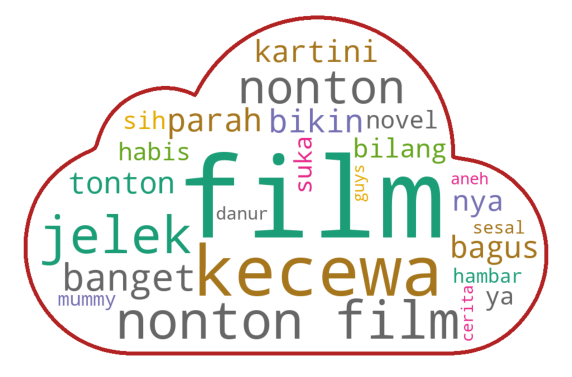

In [ ]:
film_negative = data[data.Sentiment == 0]
normal_string = []

for t in film_negative['Clean Text']:
  normal_string.append(t)

normal_string = pd.Series(normal_string).str.cat(sep=' ')
from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800, margin=10,
                      background_color='white', colormap='Dark2',
                      max_font_size=200, min_font_size=25,
                      mask=cloud_mask, contour_width=10, contour_color='firebrick',
                      max_words=100).generate(normal_string)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

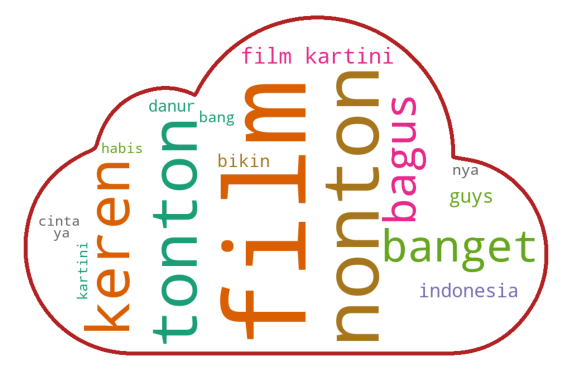

In [ ]:
film_positive = data[data.Sentiment == 1]
normal_string = []

for t in film_positive['Clean Text']:
  normal_string.append(t)

normal_string = pd.Series(normal_string).str.cat(sep=' ')
from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800, margin=10,
                      background_color='white', colormap='Dark2',
                      max_font_size=200, min_font_size=25,
                      mask=cloud_mask, contour_width=10, contour_color='firebrick',
                      max_words=100).generate(normal_string)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()